In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
##Read  the data set
from google.colab import drive
drive.mount("/content/drive")
path = "/content/drive/MyDrive/ML clg/PlayTennis.csv"
df = pd.read_csv(path)

value=['Outlook','Temprature','Humidity','Wind']
print(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     outlook  temp humidity  windy play
0      sunny   hot     high  False   no
1      sunny   hot     high   True   no
2   overcast   hot     high  False  yes
3      rainy  mild     high  False  yes
4      rainy  cool   normal  False  yes
5      rainy  cool   normal   True   no
6   overcast  cool   normal   True  yes
7      sunny  mild     high  False   no
8      sunny  cool   normal  False  yes
9      rainy  mild   normal  False  yes
10     sunny  mild   normal   True  yes
11  overcast  mild     high   True  yes
12  overcast   hot   normal  False  yes
13     rainy  mild     high   True   no


In [ ]:
#dataset visualization
df.head()
df.shape

(14, 5)

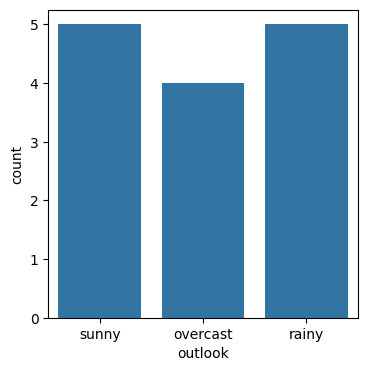

In [ ]:
ax = plt.subplots(figsize = (4,4))
ax = sns.countplot(x=df['outlook'])
plt.show()

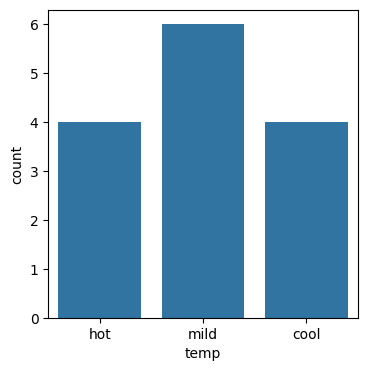

In [ ]:
ax = plt.subplots(figsize = (4,4))
ax = sns.countplot(x=df['temp'])
plt.show()

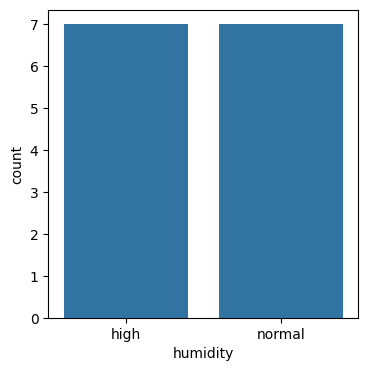

In [ ]:
ax = plt.subplots(figsize = (4,4))
ax = sns.countplot(x=df['humidity'])
plt.show()

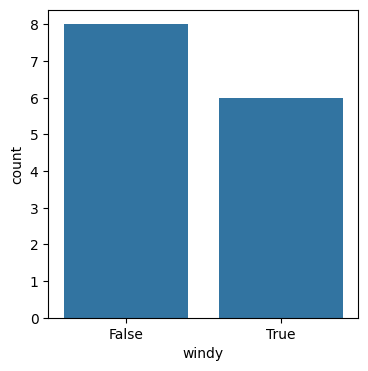

In [ ]:
ax = plt.subplots(figsize = (4,4))
ax = sns.countplot(x=df['windy'])
plt.show()

In [ ]:
#feature Extraction
# Separate features (X) and target variable (y)

X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]   # The last column 'PlayTennis'

****Use OneHotEncoder for categorical variables in features****

In [ ]:
categorical_features = ['outlook', 'temp', 'humidity', 'windy']

preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

X_encoded = preprocessor.fit_transform(X)

**Use LabelEncoder for the target variable**

In [ ]:
#use LabelEncoder for target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

**Split the dataset into training and testing sets**

In [ ]:
#split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

**Create a Decision Tree classifier**

In [ ]:
#create decision tree classifier
dt_classifier = DecisionTreeClassifier(criterion="entropy", random_state=42)

**Fit the model to the training data**

In [ ]:
#fit model to the training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

**Make predictions on the test set**

In [ ]:
#make prediction for the test case
y_pred = dt_classifier.predict(X_test)

**Evaluate the performance of the classifier**

In [ ]:
#evaluate performance classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

**Print the results**

DT Accuracy: 1.0
DT Confusion Matrix:
[[1 0]
 [0 2]]
DT Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



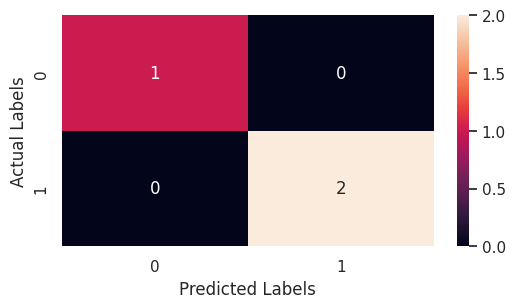

In [ ]:
#print the result
print(f'DT Accuracy: {accuracy}')
print(f'DT Confusion Matrix:\n{conf_matrix}')
sns.set(rc={'figure.figsize':(6,3)})
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = 'd')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
print(f'DT Classification Report:\n{classification_report_str}')

**Output Visualization using Bar Plot**

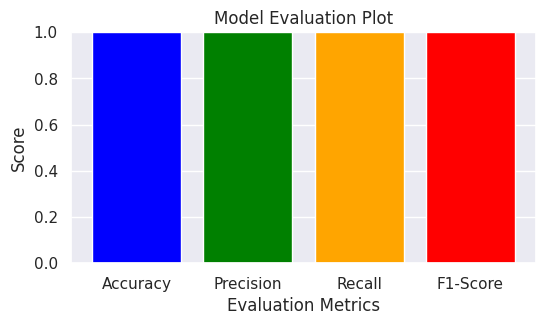

In [ ]:
#outlook visualization using barplot
# Assuming we have already evaluated the model and obtained these metrics, hence plotting the same in a bar plot
accuracy = 1.0
precision = 1.0
recall = 1.0
f1_score = 1.0

# Plotting the bar plot
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics_values = [accuracy, precision, recall, f1_score]

plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'orange', 'red'])
plt.ylim([0, 1])  # Set the y-axis limit between 0 and 1
plt.title('Model Evaluation Plot')
plt.xlabel('Evaluation Metrics')
plt.ylabel('Score')
plt.show()

**Plot the decision tree**

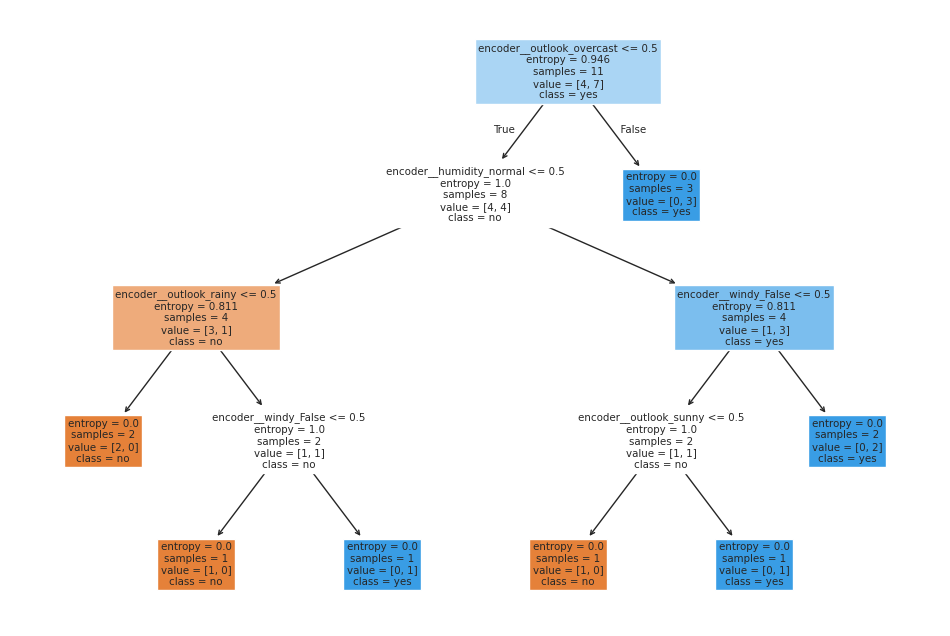

In [ ]:
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, filled=True, feature_names=list(preprocessor.get_feature_names_out(X.columns)), class_names=list(label_encoder.classes_))
plt.show()

In [ ]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, filled=True, feature_names=list(preprocessor.get_feature_names_out(X.columns)), class_names=list(label_encoder.classes_))

# Save the plot as a PDF file
plt.savefig("/content/drive/MyDrive/ML clg/decision_tree_plot.pdf")
#plt.savefig('decision_tree_plot.pdf')

# Show the plot
plt.show()

NameError: name 'dt_classifier' is not defined

<Figure size 1200x800 with 0 Axes>